## Explorando datos con un DataFrame Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 4, Finished, Available, Finished)

In [3]:
df = spark.table('AW_Customer').toPandas()
display(df.head())

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 0afcd830-1ecc-45ee-8aca-5a21861ed0f1)

In [4]:
# Análisis general

num_rows, num_cols = df.shape
null_counts = df.isna().sum()
null_percentages = (df.isna().mean() * 100).round(2)
column_types = df.dtypes
unique_counts = df.nunique()
description = df.describe()

print("Número de filas:", num_rows)
print("Número de columnas:", num_cols)

print("\nValores nulos por columna:\n", null_counts)
print("\nPorcentaje de valores nulos por columna:\n", null_percentages)
print("\nTipos de datos por columna:\n", column_types)
print("\nCantidad de valores únicos por columna:\n", unique_counts)
print("\nDescripción estadística general:\n", description)

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 6, Finished, Available, Finished)

Número de filas: 847
Número de columnas: 15

Valores nulos por columna:
 CustomerID        0
NameStyle         0
Title             7
FirstName         0
MiddleName      343
LastName          0
Suffix          799
CompanyName       0
SalesPerson       0
EmailAddress      0
Phone             0
PasswordHash      0
PasswordSalt      0
rowguid           0
ModifiedDate      0
dtype: int64

Porcentaje de valores nulos por columna:
 CustomerID       0.00
NameStyle        0.00
Title            0.83
FirstName        0.00
MiddleName      40.50
LastName         0.00
Suffix          94.33
CompanyName      0.00
SalesPerson      0.00
EmailAddress     0.00
Phone            0.00
PasswordHash     0.00
PasswordSalt     0.00
rowguid          0.00
ModifiedDate     0.00
dtype: float64

Tipos de datos por columna:
 CustomerID               int32
NameStyle                 bool
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix    

In [5]:
# Agrupaciones y conteos

customers_per_title = df.groupby("Title").size().reset_index(name="total").sort_values("total", ascending=False)
print("\nCantidad de clientes por título (Title):\n", customers_per_title)

customers_per_salesperson = df.groupby("SalesPerson").size().reset_index(name="total").sort_values("total", ascending=False)
print("\nCantidad de clientes por vendedor (SalesPerson):\n", customers_per_salesperson)

companies_count = df["CompanyName"].nunique()
print("\nCantidad de compañías únicas:", companies_count)

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 7, Finished, Available, Finished)


Cantidad de clientes por título (Title):
   Title  total
0   Mr.    490
1   Ms.    340
2   Sr.      6
3  Sra.      4

Cantidad de clientes por vendedor (SalesPerson):
                 SalesPerson  total
8      adventure-works\shu0    151
3  adventure-works\jillian0    148
4     adventure-works\josé1    142
1  adventure-works\garrett1     78
2      adventure-works\jae0     78
7   adventure-works\pamela0     74
0    adventure-works\david8     73
5    adventure-works\linda3     71
6  adventure-works\michael9     32

Cantidad de compañías únicas: 439


In [6]:
# Fechas

df["ModifiedDate"] = pd.to_datetime(df["ModifiedDate"])
date_range = (df["ModifiedDate"].min(), df["ModifiedDate"].max())
print("\nRango de fechas de modificación:", date_range)

modifications_per_year = df["ModifiedDate"].dt.year.value_counts().sort_index()
print("\nCantidad de modificaciones por año:\n", modifications_per_year)

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 8, Finished, Available, Finished)


Rango de fechas de modificación: (Timestamp('2005-07-01 00:00:00'), Timestamp('2009-05-16 16:33:33.123000'))

Cantidad de modificaciones por año:
 ModifiedDate
2005    308
2006    313
2007    210
2008      6
2009     10
Name: count, dtype: int64


In [7]:
# Calidad de datos

exact_duplicates = df[df.duplicated()]
print("\nFilas duplicadas exactas:\n", exact_duplicates)

duplicates_by_name = df[df.duplicated(subset=["FirstName", "LastName", "CompanyName"])]
print("\nDuplicados por nombre y compañía:\n", duplicates_by_name)

df["Email_length"] = df["EmailAddress"].str.len()
email_length_stats = df["Email_length"].describe()
print("\nEstadísticas de longitud de direcciones de email:\n", email_length_stats)

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 9, Finished, Available, Finished)


Filas duplicadas exactas:
 Empty DataFrame
Columns: [CustomerID, NameStyle, Title, FirstName, MiddleName, LastName, Suffix, CompanyName, SalesPerson, EmailAddress, Phone, PasswordHash, PasswordSalt, rowguid, ModifiedDate]
Index: []

Duplicados por nombre y compañía:
      CustomerID  NameStyle Title  FirstName MiddleName    LastName Suffix  \
8         29557      False   Mr.  Alexander         J.      Berger     II   
9         29577      False   Mr.     Lester         J.      Bowman    Sr.   
10        29584      False   Mr.     Walter         J.       Brian     IV   
11        29714      False   Mr.    Rudolph         J.      Dillon    Sr.   
12        29975      False   Mr.     Walter         J.        Mays    Sr.   
..          ...        ...   ...        ...        ...         ...    ...   
842       29781      False   Mr.        Guy       None     Gilbert   None   
843       29793      False   Mr.    Michael       None       Graff   None   
844       29809      False   Mr.      

In [8]:
# Valores únicos

unique_values_summary = df.apply(pd.Series.nunique).sort_values()
print("\nCantidad de valores únicos por columna (ordenados):\n", unique_values_summary)

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 10, Finished, Available, Finished)


Cantidad de valores únicos por columna (ordenados):
 NameStyle         1
Title             4
Suffix            5
SalesPerson       9
Email_length     12
MiddleName       28
ModifiedDate     29
FirstName       315
LastName        398
Phone           430
CompanyName     439
PasswordHash    440
PasswordSalt    440
EmailAddress    440
CustomerID      847
rowguid         847
dtype: int64


In [9]:
# Gráficos: Estilo general

sns.set(style="whitegrid")

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 11, Finished, Available, Finished)

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 12, Finished, Available, Finished)

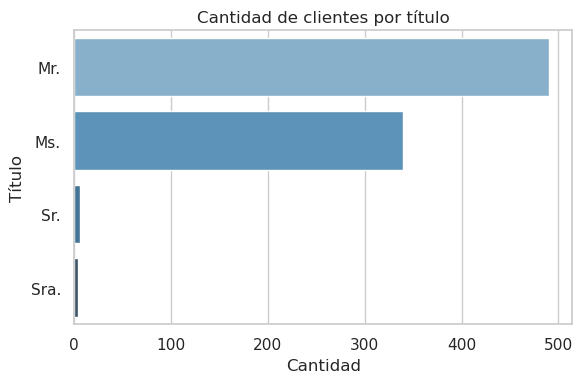

In [10]:
# Gráfico de barras: cantidad de clientes por título

customers_per_title = df["Title"].value_counts().reset_index()
customers_per_title.columns = ["Title", "Count"]

plt.figure(figsize=(6,4))
sns.barplot(x="Count", y="Title", data=customers_per_title, palette="Blues_d")
plt.title("Cantidad de clientes por título")
plt.xlabel("Cantidad")
plt.ylabel("Título")
plt.tight_layout()
plt.show()

StatementMeta(, f864a895-ff69-4272-b0fc-d390789bd01e, 13, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


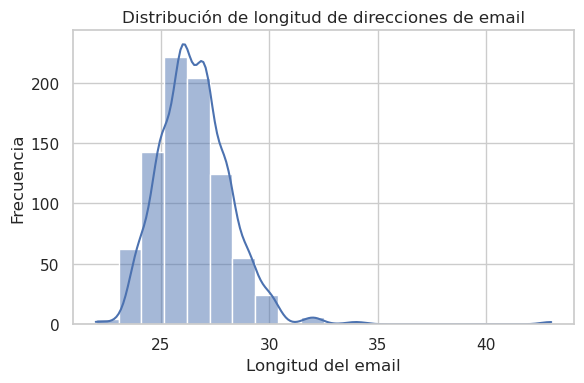

In [11]:
# Histograma: longitud de emails
df["Email_length"] = df["EmailAddress"].str.len()

plt.figure(figsize=(6,4))
sns.histplot(df["Email_length"], bins=20, kde=True)
plt.title("Distribución de longitud de direcciones de email")
plt.xlabel("Longitud del email")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()